# LOAN PREDICTION: DATA-DRIVEN INSIGHTS FOR CREDIT RISK ASSESSMENT

## LABELS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("Loan.csv")
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval

## 1 understand the data

In [3]:
df.shape

(20000, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


In [6]:
df.describe(include='O').T

,count,unique,top,freq
ApplicationDate,20000,20000,2018-01-01,1
EmploymentStatus,20000,3,Employed,17036
EducationLevel,20000,5,Bachelor,6054
MaritalStatus,20000,4,Married,10041
HomeOwnershipStatus,20000,4,Mortgage,7939
LoanPurpose,20000,5,Home,5925


In [7]:
print("the features of the dataset are:")
features_list=[feature for feature in df.columns]
for feature in features_list:
    print(feature)

the features of the dataset are:
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **`LoanApproved`**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **`RiskScore`**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

These features help in assessing the financial health, creditworthiness, and risk profile of the loan applicant, which ultimately determines loan approval, terms, and interest rates.

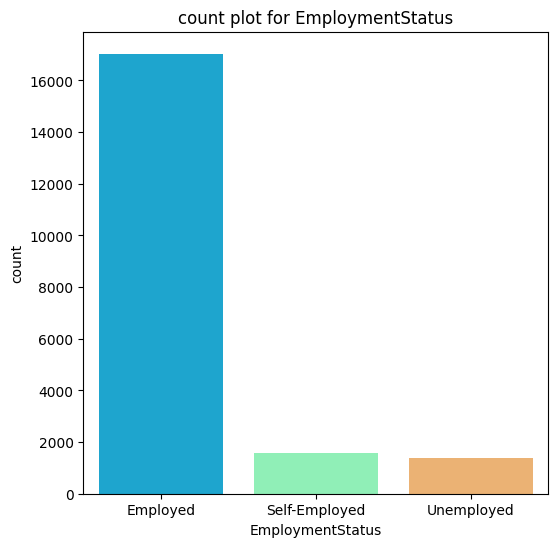

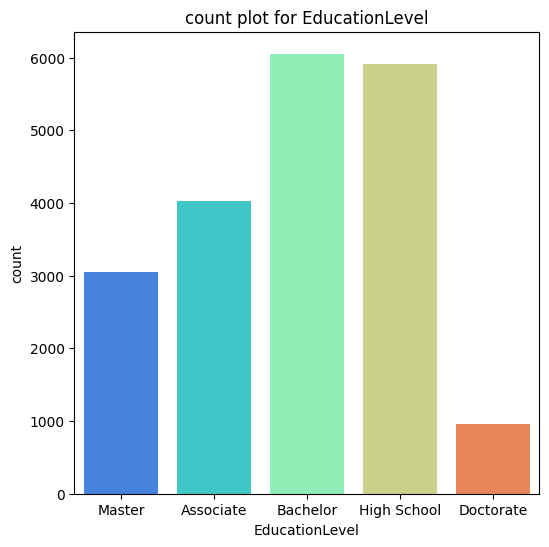

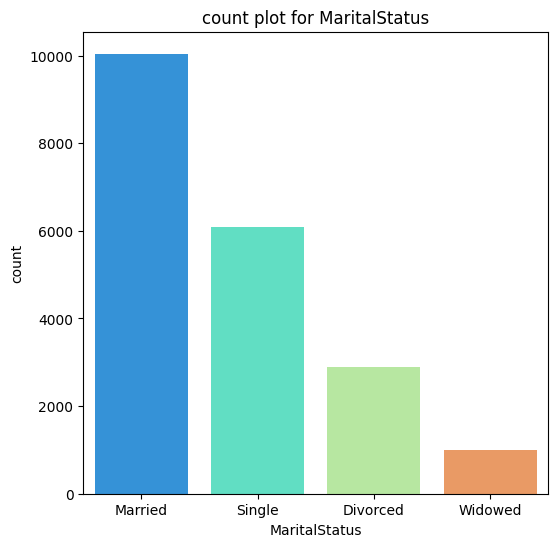

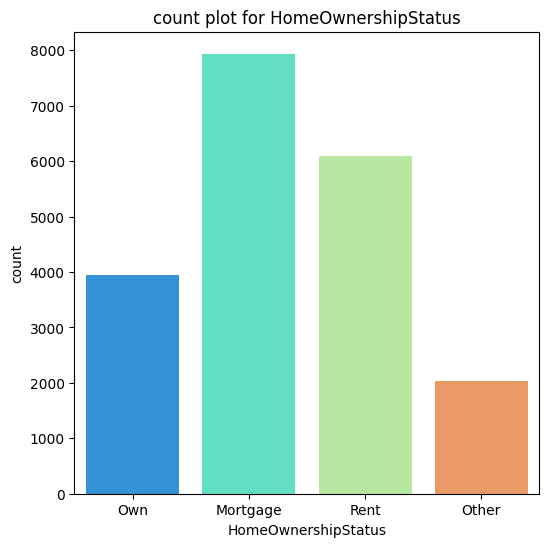

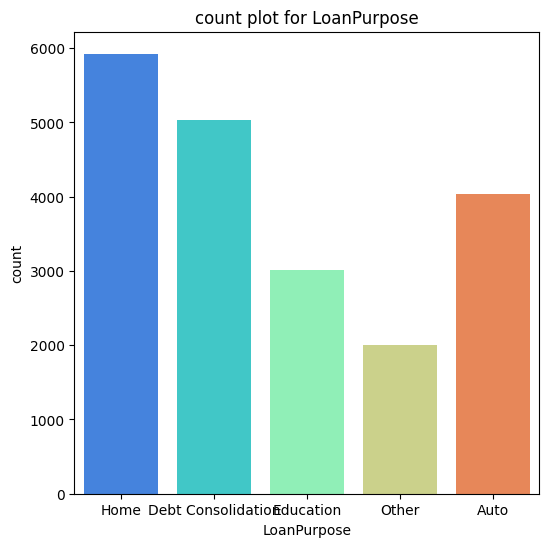

In [8]:
categorical_columns=df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]: # skip the fir̥st feature
    plt.figure(figsize=(6,6))
    sns.countplot(data=df,x=col,hue=col,palette='rainbow')
    plt.title(f"count plot for {col}")
    plt.show()

### most of the loan needed persons are
* employed
* married
* comparativly less educated
* need loan for building home

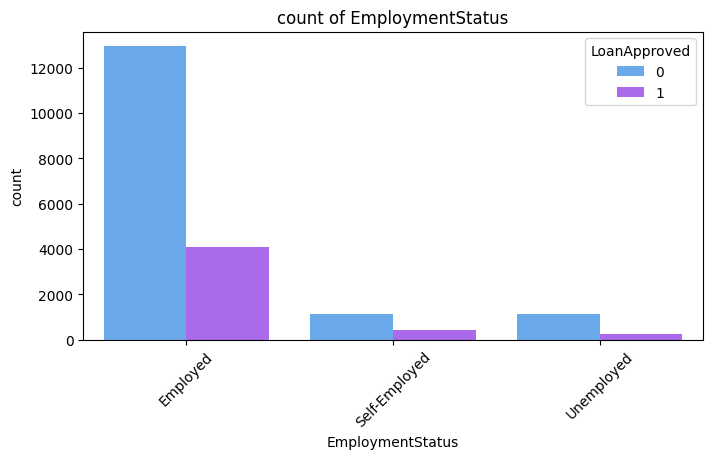

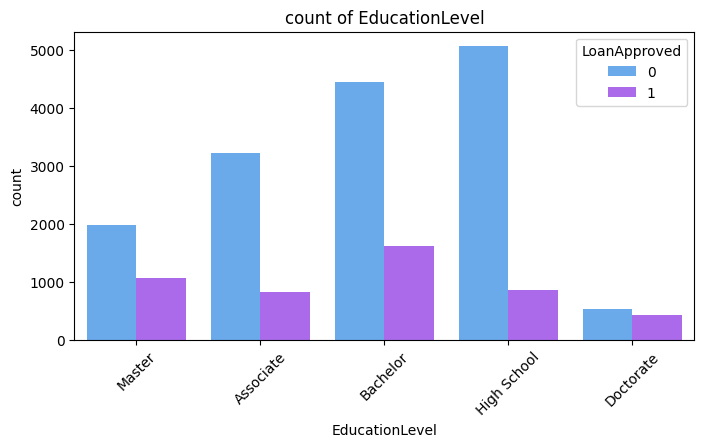

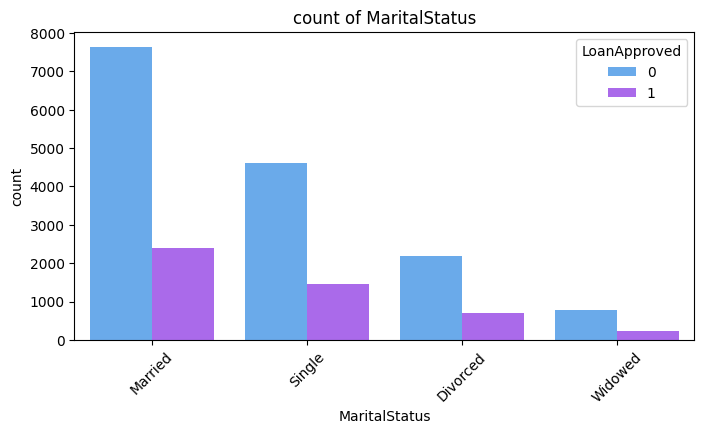

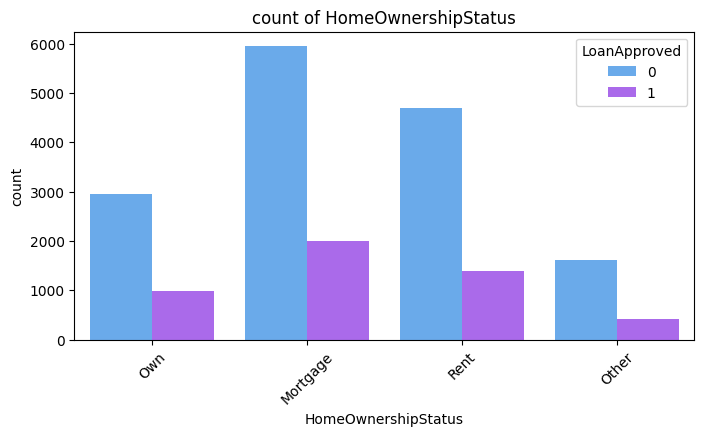

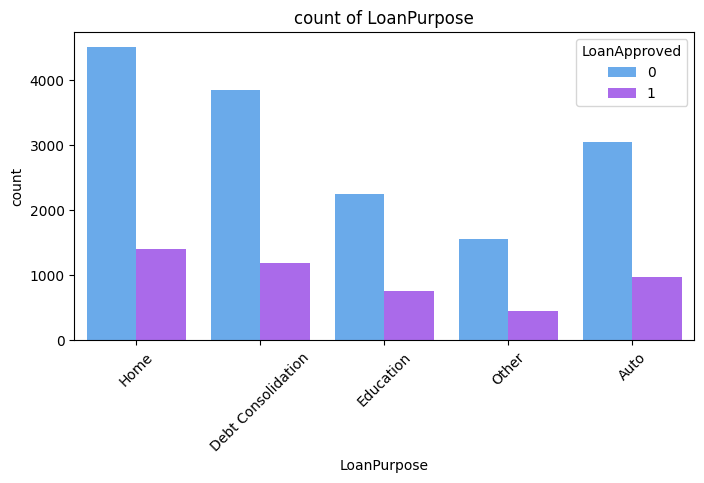

In [9]:
# plot countplot for each categorical colum
for col in categorical_columns[1:]: # skip the first feature 
    plt.figure(figsize=(8,4))
    sns.countplot(data=df,x=col,palette='cool',hue='LoanApproved')
    plt.title(f"count of {col}")
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.show()

majority of loan request are rejected in all caterories(there might be some other reson affecting the riskscore)

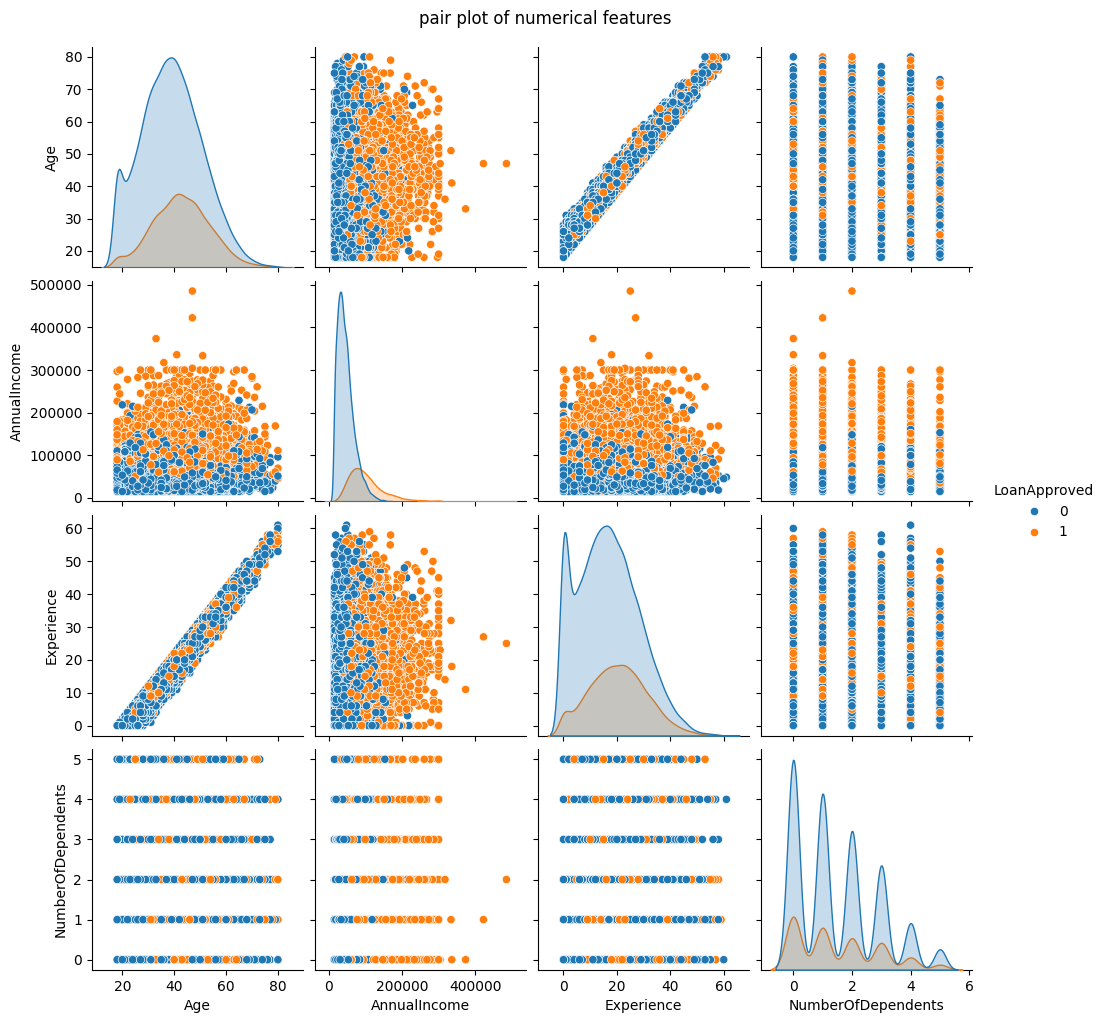

In [10]:
# multivariate analysis: pair plot of numerical features of personal details
sns.pairplot(df[['Age','AnnualIncome','Experience','NumberOfDependents','LoanApproved']],hue='LoanApproved')
plt.suptitle('pair plot of numerical features ',y=1.02)
plt.show()

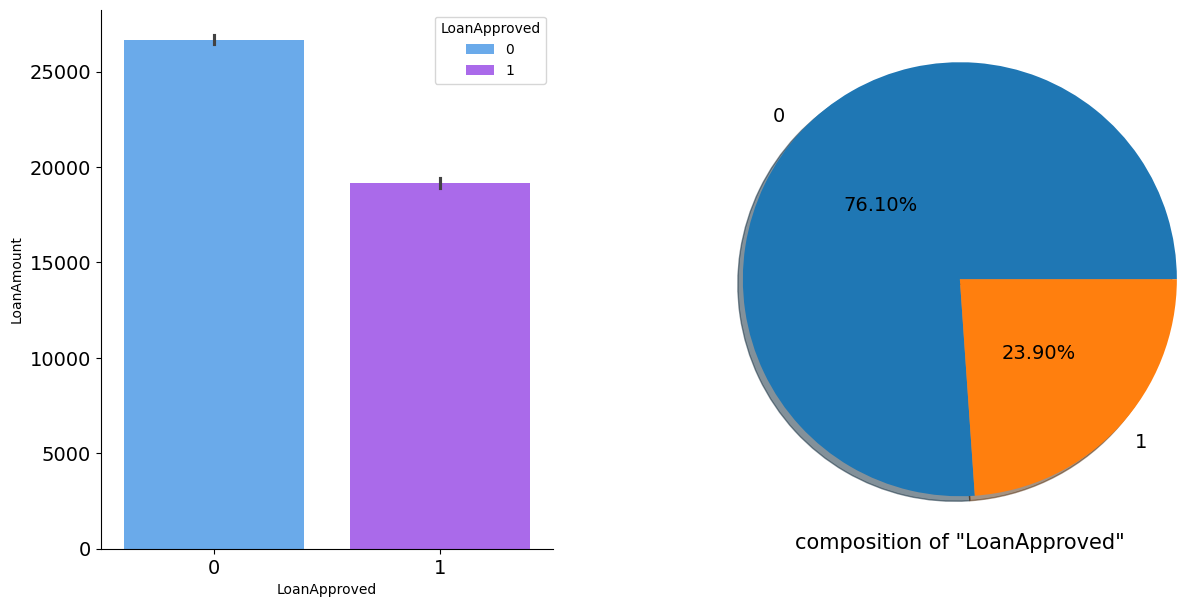

In [11]:
# checking the target 
plt.figure(figsize=(14,7))
# barplot
ax1= plt.subplot(1,2,1)
cp = sns.barplot(x='LoanApproved',y='LoanAmount',data=df,palette='cool',hue='LoanApproved')
ax1.set_xlabel("LoanApproved")
ax1.set_ylabel('LoanAmount')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)


# pie plot
ax2=plt.subplot(1,2,2)
plt.pie(x=df['LoanApproved'].value_counts(),
        labels=list(df['LoanApproved'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.5,
        shadow=True,
        radius=1.2,
        textprops={'fontsize':14,'color':'black'})
ax2.set_xlabel(" ")
plt.xlabel('composition of "LoanApproved"',fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [12]:
df["LoanAmount"].groupby(df['LoanApproved']).mean()

LoanApproved
0    26684.996386
1    19144.709414
Name: LoanAmount, dtype: float64

## data cleaning


In [13]:
df.isna().sum().sum()

0

In [14]:
df.duplicated().sum()

0

## feature engineeering

In [15]:
df['BankBalance']=df['SavingsAccountBalance']+df['CheckingAccountBalance']  # joining two columns into one
df['BankBalance']

0        8834
1        8087
2        1781
3        2892
4        6536
         ... 
19995    3664
19996    7093
19997    2921
19998    3297
19999    4448
Name: BankBalance, Length: 20000, dtype: int64

In [16]:
df.drop('SavingsAccountBalance',axis=1,inplace=True)
df.drop('CheckingAccountBalance',axis=1,inplace=True)   # removing columns

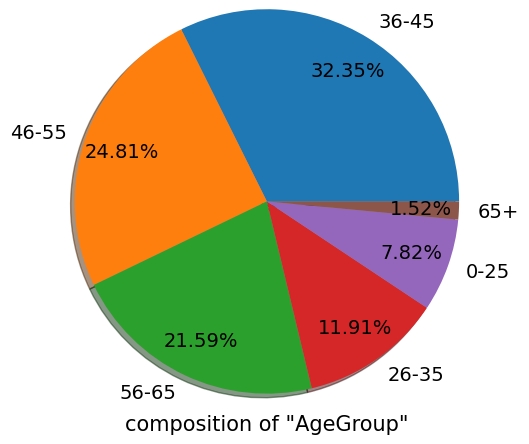

In [17]:
# age binning
df['AgeGroup']=pd.cut(df['Age'],bins=[0,25,35,45,55,65,100],
                      labels=['0-25','26-35','36-45','46-55','56-65','65+'])
plt.pie(x=df['AgeGroup'].value_counts(),
        labels=list(df['AgeGroup'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('composition of "AgeGroup"',fontsize=15,labelpad=20)
plt.show()

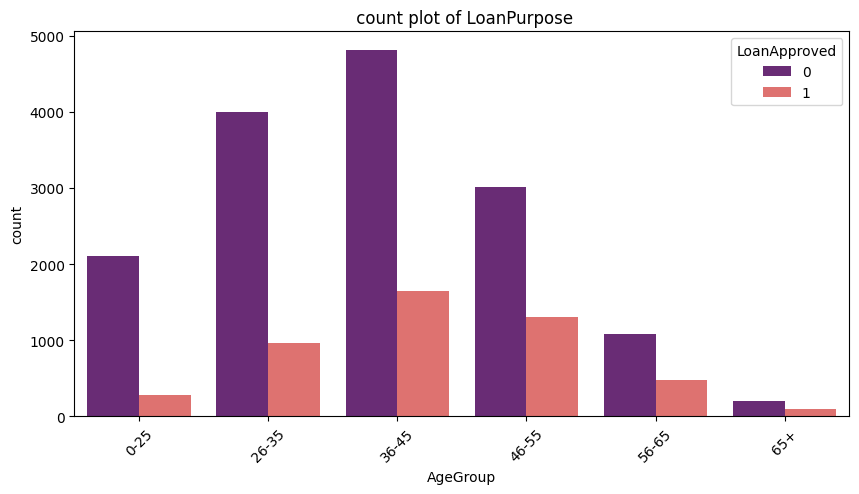

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='AgeGroup',hue='LoanApproved',palette='magma')
plt.title(f" count plot of {col}")
plt.xticks(rotation=45)
plt.show()

In [19]:
df.drop('AgeGroup',axis=1,inplace=True)

In [20]:
df[['year','month','day']]=df['ApplicationDate'].str.split('-',expand=True)

df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)

df[['ApplicationDate','year','month','day']]

,ApplicationDate,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [21]:
df['year'].max()    # date error

2072

In [22]:
df.drop(['ApplicationDate','year','month','day'],axis=1,inplace=True)  # thes column are error so  drop it

In [23]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780,6728.607250
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262,6975.287546
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000,152.000000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000,2862.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000,4816.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000,8141.250000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000,201517.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

## ENCODING

In [25]:
categorical_columns=df.select_dtypes(include=['object','category']).columns.tolist() # category and object is used classify easly in python
print("categorical_columns:",categorical_columns)

categorical_columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


## ordinal data

many machine learning models , like decision tree regression models,rely on the relative order of numeric values.
by manually assign meaningfull numbers,the model can better capture the relashionship between the ordinal categories

In [26]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [27]:
df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [28]:
# ordinal encoding
encodinglev=['Employed', 'Self-Employed', 'Unemployed']
encoder = OrdinalEncoder(categories=encodinglev)
df['EmploymentStatus']=df['EmploymentStatus'].map({'Unemployed':0,'Self-Employed':1,'Employed':2})

In [29]:
df['EmploymentStatus'].unique()

array([2, 1, 0], dtype=int64)

In [30]:
df['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [31]:
encodinglevel=['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate']
encoder1=OrdinalEncoder(categories=encodinglevel)
df['EducationLevel']=df['EducationLevel'].map({'Bachelor':2, 'High School':0, 'Doctorate':4,'Master':3, 'Associate':1})


In [32]:
df['EducationLevel'].unique()

array([3, 1, 2, 0, 4], dtype=int64)

## label encoder

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64

In [35]:
le=LabelEncoder()
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['MaritalStatus'].unique()

array([1, 2, 0, 3])

In [36]:
df['MaritalStatus'].value_counts()

MaritalStatus
1    10041
2     6078
0     2882
3      999
Name: count, dtype: int64

In [37]:
df['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

In [38]:
df['LoanApproved']=le.fit_transform(df['LoanApproved'])
df['LoanApproved'].unique()

array([0, 1], dtype=int64)

In [39]:
df['HomeOwnershipStatus'].value_counts()

HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64

In [40]:
df['HomeOwnershipStatus']=le.fit_transform(df['HomeOwnershipStatus'])
df['HomeOwnershipStatus'].unique()

array([2, 0, 3, 1])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int32  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int32  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [42]:
df['LoanPurpose'].value_counts()

LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64

In [43]:
df['LoanPurpose']=le.fit_transform(df['LoanPurpose'])
df['LoanPurpose'].unique()

array([3, 1, 2, 4, 0])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int32  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int32  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

# REMOVING UNWANTED FEATURES

## BASED ON CORRELATION

In [45]:
corr=df.corr()


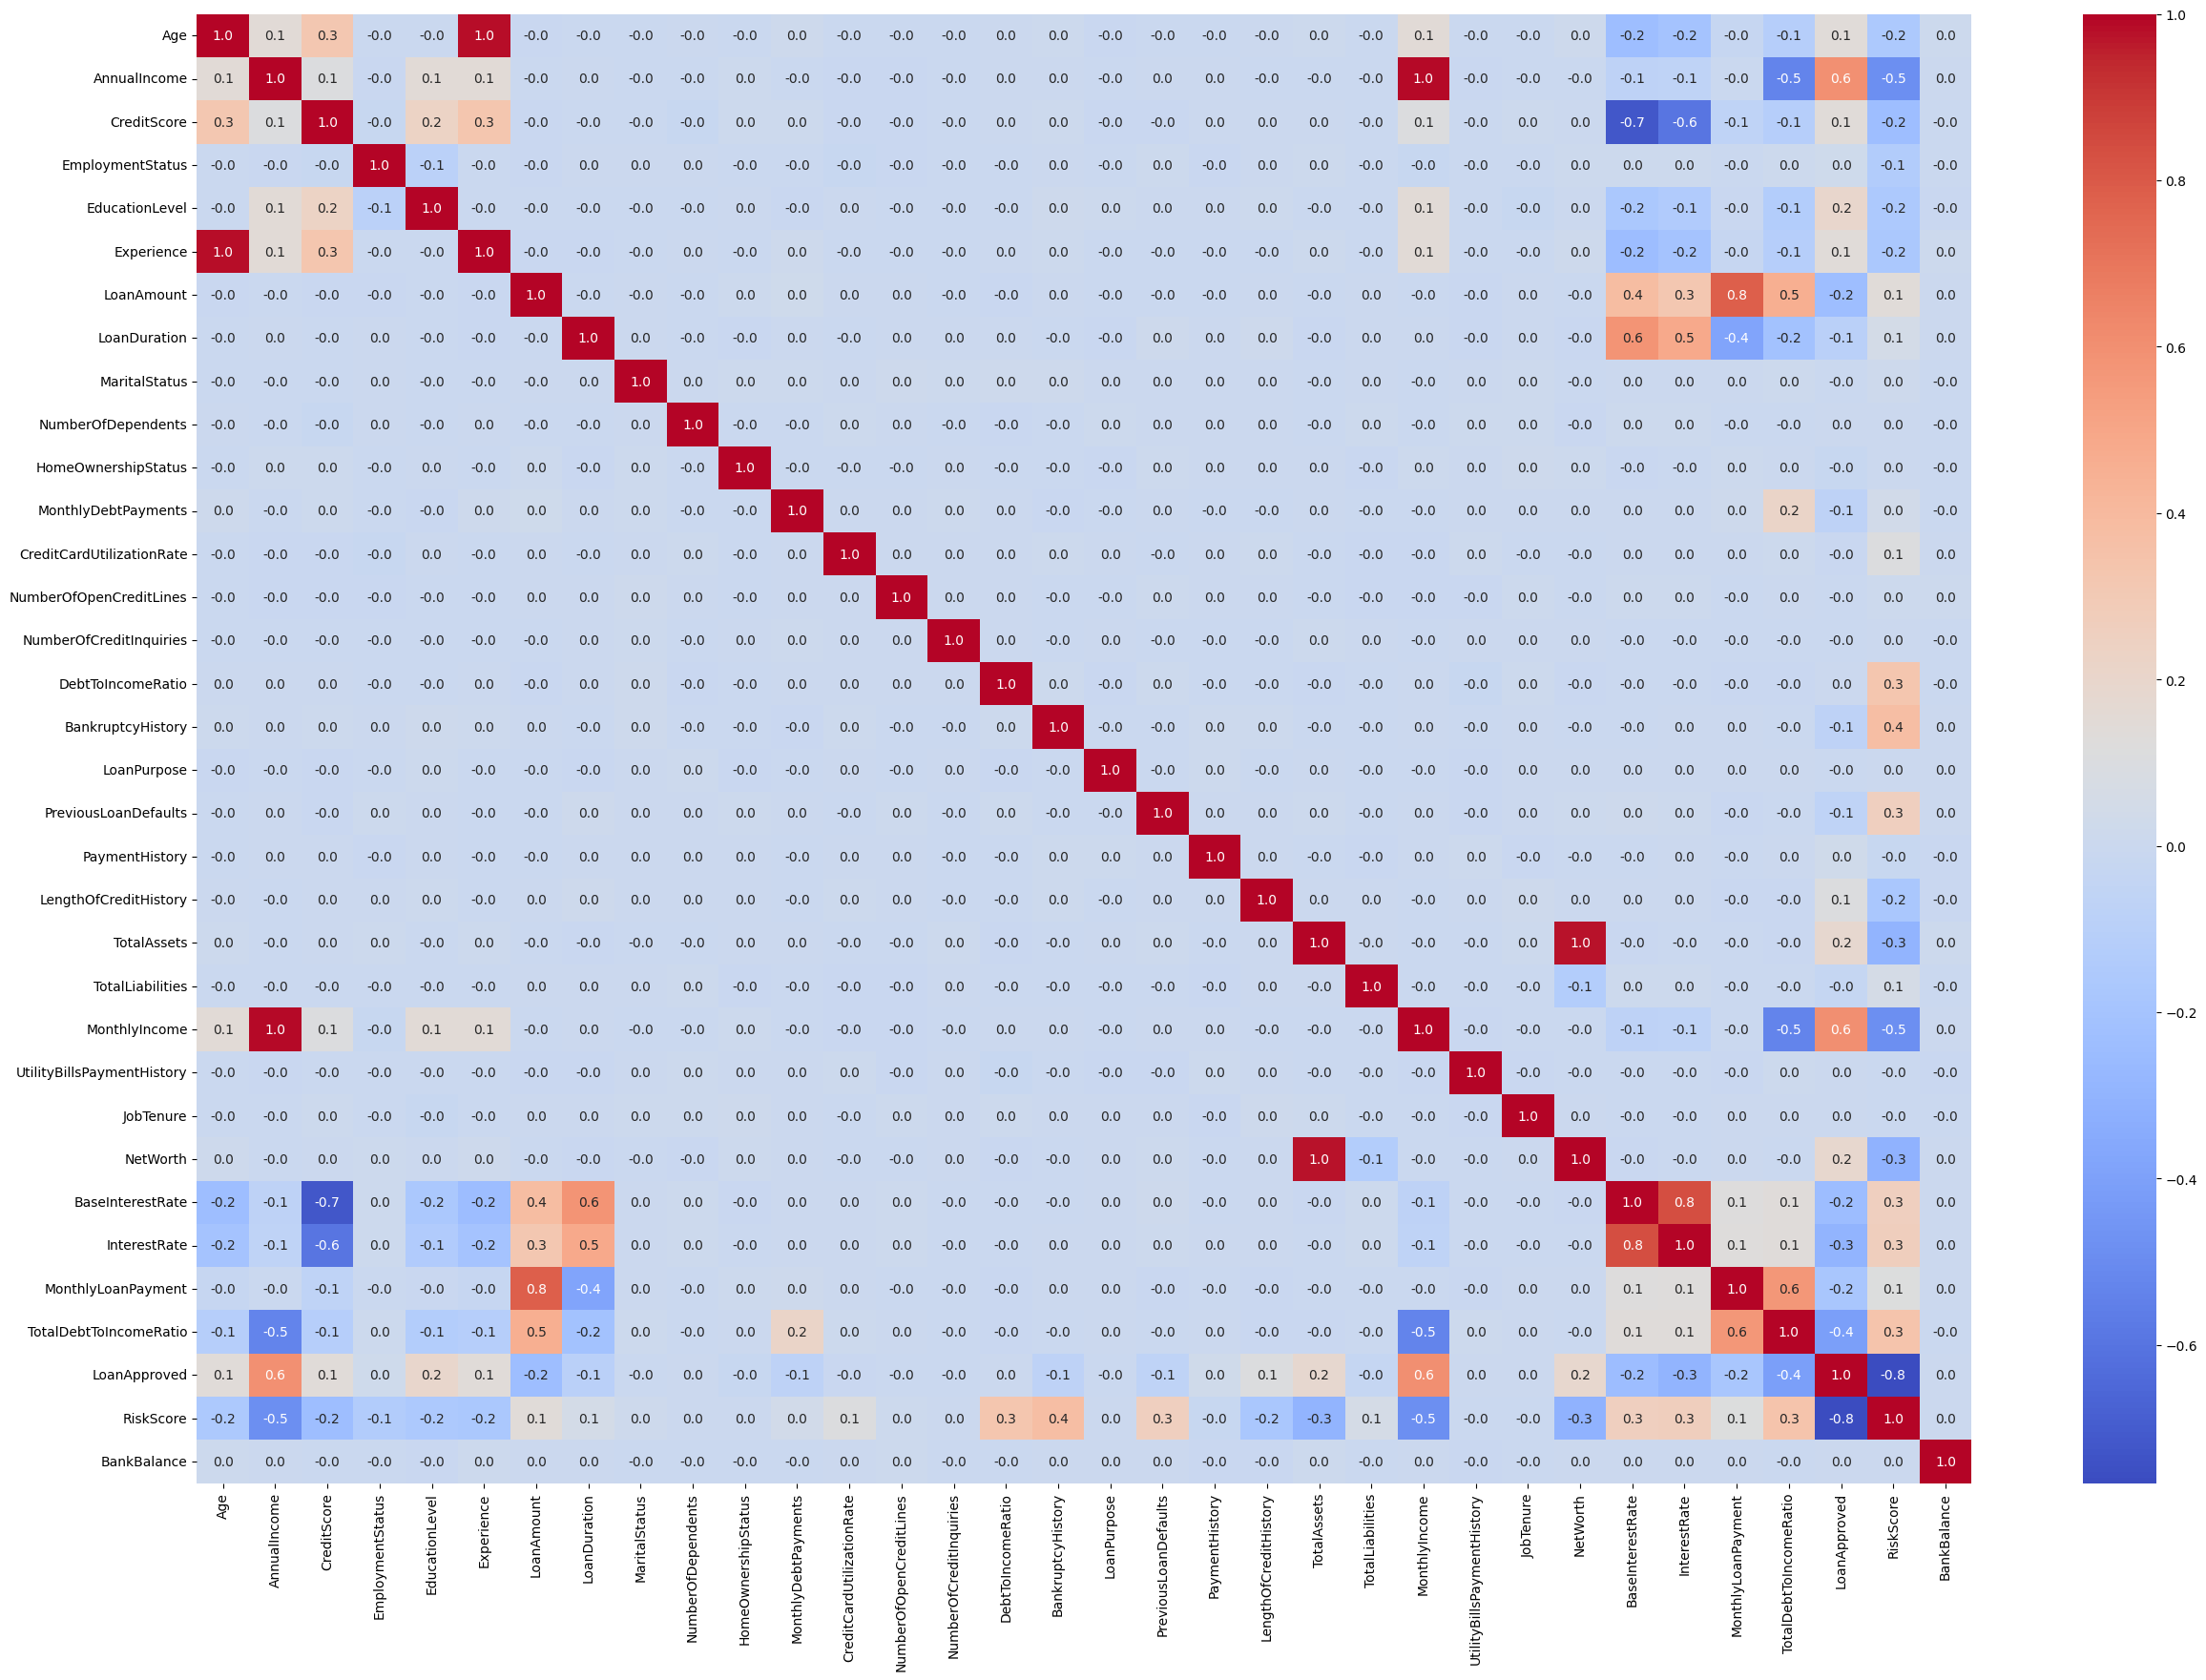

In [46]:
plt.figure(figsize=(30,20))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f')
plt.show()

In [47]:
# ANALYSING CORRELATION
df[['TotalDebtToIncomeRatio','MonthlyIncome']].corr()
# highly correlated

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.538314
MonthlyIncome,-0.538314,1.000000


In [48]:
df.drop('TotalDebtToIncomeRatio',axis=1,inplace=True)

In [49]:
correlation_matrix=df.corr()

# set the correlation theshold
threshold=0.5

# find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range (len(correlation_matrix.columns)):
    for j in range(i):
        # check if the absolute correlation exceeds the threshold 
        if abs(correlation_matrix.iloc[i,j])>threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i],
                                            correlation_matrix.columns[j]))
# print all part of highly correlated  features
print(highly_correlated_pairs)

[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets'), ('BaseInterestRate', 'CreditScore'), ('BaseInterestRate', 'LoanDuration'), ('InterestRate', 'CreditScore'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount'), ('LoanApproved', 'AnnualIncome'), ('LoanApproved', 'MonthlyIncome'), ('RiskScore', 'LoanApproved')]


In [50]:
df.drop(['Experience','MonthlyIncome','NetWorth','BaseInterestRate','MonthlyLoanPayment'],axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   LoanAmount                  20000 non-null  int64  
 6   LoanDuration                20000 non-null  int64  
 7   MaritalStatus               20000 non-null  int32  
 8   NumberOfDependents          20000 non-null  int64  
 9   HomeOwnershipStatus         20000 non-null  int32  
 10  MonthlyDebtPayments         20000 non-null  int64  
 11  CreditCardUtilizationRate   20000 non-null  float64
 12  NumberOfOpenCreditLines     20000 non-null  int64  
 13  NumberOfCreditInquiries     200

### low correlatiob B/W the features and target

In [52]:
# step 1: calculate th ecorrelation of each features with the target 
corr_with_target=df.corr()['LoanApproved'].sort_values(ascending=True)

# step 2: set the threshhold for low correlation (-0.05 to 0.05)
low_corr_features=corr_with_target[(corr_with_target>-0.05)&
                                   (corr_with_target<0.05)]

# step 3: print the low correlated features 
print("features with correlated between -0.05 & 0.05")
print(low_corr_features)

features with correlated between -0.05 & 0.05
TotalLiabilities             -0.029434
HomeOwnershipStatus          -0.018135
CreditCardUtilizationRate    -0.010466
LoanPurpose                  -0.007062
MaritalStatus                -0.006828
NumberOfCreditInquiries      -0.005885
NumberOfOpenCreditLines      -0.004769
DebtToIncomeRatio             0.000034
BankBalance                   0.001123
NumberOfDependents            0.001717
UtilityBillsPaymentHistory    0.003303
JobTenure                     0.004997
EmploymentStatus              0.020411
PaymentHistory                0.030804
Name: LoanApproved, dtype: float64


In [53]:
# below features are very less correlated with the target variable :
df.drop(["JobTenure","UtilityBillsPaymentHistory","NumberOfDependents","NumberOfOpenCreditLines","DebtToIncomeRatio",
        "NumberOfCreditInquiries","MaritalStatus","LoanPurpose"],axis=1,inplace=True)


In [54]:
df

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,TotalAssets,TotalLiabilities,InterestRate,LoanApproved,RiskScore,BankBalance
0,45,39948,617,2,3,13152,48,2,183,0.354418,0,0,29,9,146111,19183,0.227590,0,49.0,8834
1,38,39709,628,2,1,26045,48,0,496,0.087827,0,0,21,9,53204,9595,0.201077,0,52.0,8087
2,47,40724,570,2,2,17627,36,3,902,0.137414,0,0,20,22,25176,128874,0.212548,0,52.0,1781
3,58,69084,545,2,0,37898,96,0,755,0.267587,0,0,27,10,104822,5370,0.300911,0,54.0,2892
4,37,103264,594,2,1,9184,36,0,274,0.320535,0,0,26,27,244305,17286,0.175990,1,36.0,6536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,2,0,24521,36,3,673,0.101288,0,0,21,7,80969,25642,0.195574,0,55.0,3664
19996,56,49246,567,2,1,25818,36,3,414,0.471818,0,0,30,28,69571,5569,0.199168,0,54.0,7093
19997,44,48958,645,2,2,37033,72,0,512,0.216596,0,0,28,8,108316,4653,0.226766,0,45.0,2921
19998,60,41025,560,2,0,14760,72,2,986,0.364758,0,0,17,13,22085,11485,0.264873,0,59.0,3297


In [55]:
df.drop(["MonthlyDebtPayments","HomeOwnershipStatus","PaymentHistory","BankBalance"],axis=1,inplace=True)

In [56]:
df.drop(["LoanDuration","EducationLevel","Age"],axis=1,inplace=True)

In [57]:
df.columns

Index(['AnnualIncome', 'CreditScore', 'EmploymentStatus', 'LoanAmount',
       'CreditCardUtilizationRate', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalAssets',
       'TotalLiabilities', 'InterestRate', 'LoanApproved', 'RiskScore'],
      dtype='object')

# PCA

PCA reduce the number of features (dimention) in a dataset 
* principle 

In [58]:
from sklearn.decomposition import PCA
# apply PCA
pca=PCA(n_components=5) # you can change the number of components to retain
loan_pca=pca.fit_transform(df)
# create a dataframe with the pca result
loan_pca_df=pd.DataFrame(loan_pca,
                         columns=[f'PC{i+1}'for i in range (loan_pca.shape[1])])
# now loan_pca_final_df contains the original data along with the pca components 
loan_pca_df.head()


,PC1,PC2,PC3,PC4,PC5
0,49191.519962,-16922.631765,-19226.179180,-11734.443601,47.310608
1,-43719.758934,-26516.952036,-19736.500048,1115.062407,58.843227
2,-71760.796043,92746.692613,-17877.040528,-7332.856357,1.296738
3,7836.064041,-30952.245168,9687.963130,13038.922337,-27.723149
4,147264.680905,-19279.383906,44270.351549,-15557.035560,15.920026


## scaling

In [59]:
# create a copy of the original data for comparison
scaled_df=df.copy()

# select numeri columns, excluding "loanapproved"
numeric_columns=df.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns

# initialize the standardscalar 
scaler=StandardScaler()

# apply the scaler only to the numeric columns
scaled_df[numeric_columns]=scaler.fit_transform(df[numeric_columns])
scaled_df.head()

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,TotalLiabilities,InterestRate,LoanApproved,RiskScore
0,-0.476172,0.890021,0.391447,-0.873672,0.425792,-0.235154,-0.333426,-0.711630,0.406853,-0.361255,-0.272968,0,-0.227149
1,-0.482095,1.105724,0.391447,0.086551,-1.242602,-0.235154,-0.333426,-0.711630,-0.362264,-0.564174,-0.901165,0,0.158551
2,-0.456940,-0.031618,0.391447,-0.540390,-0.932273,-0.235154,-0.333426,0.841287,-0.594290,1.960232,-0.629370,0,0.158551
3,0.245912,-0.521852,0.391447,0.969319,-0.117617,-0.235154,-0.333426,-0.592175,0.065048,-0.653591,1.464331,0,0.415684
4,1.093004,0.439006,0.391447,-1.169194,0.213746,-0.235154,-0.333426,1.438563,1.219738,-0.401403,-1.495584,1,-1.898515


$$ x'=\frac {x=min(x)}{max
} $$

## handling outliers

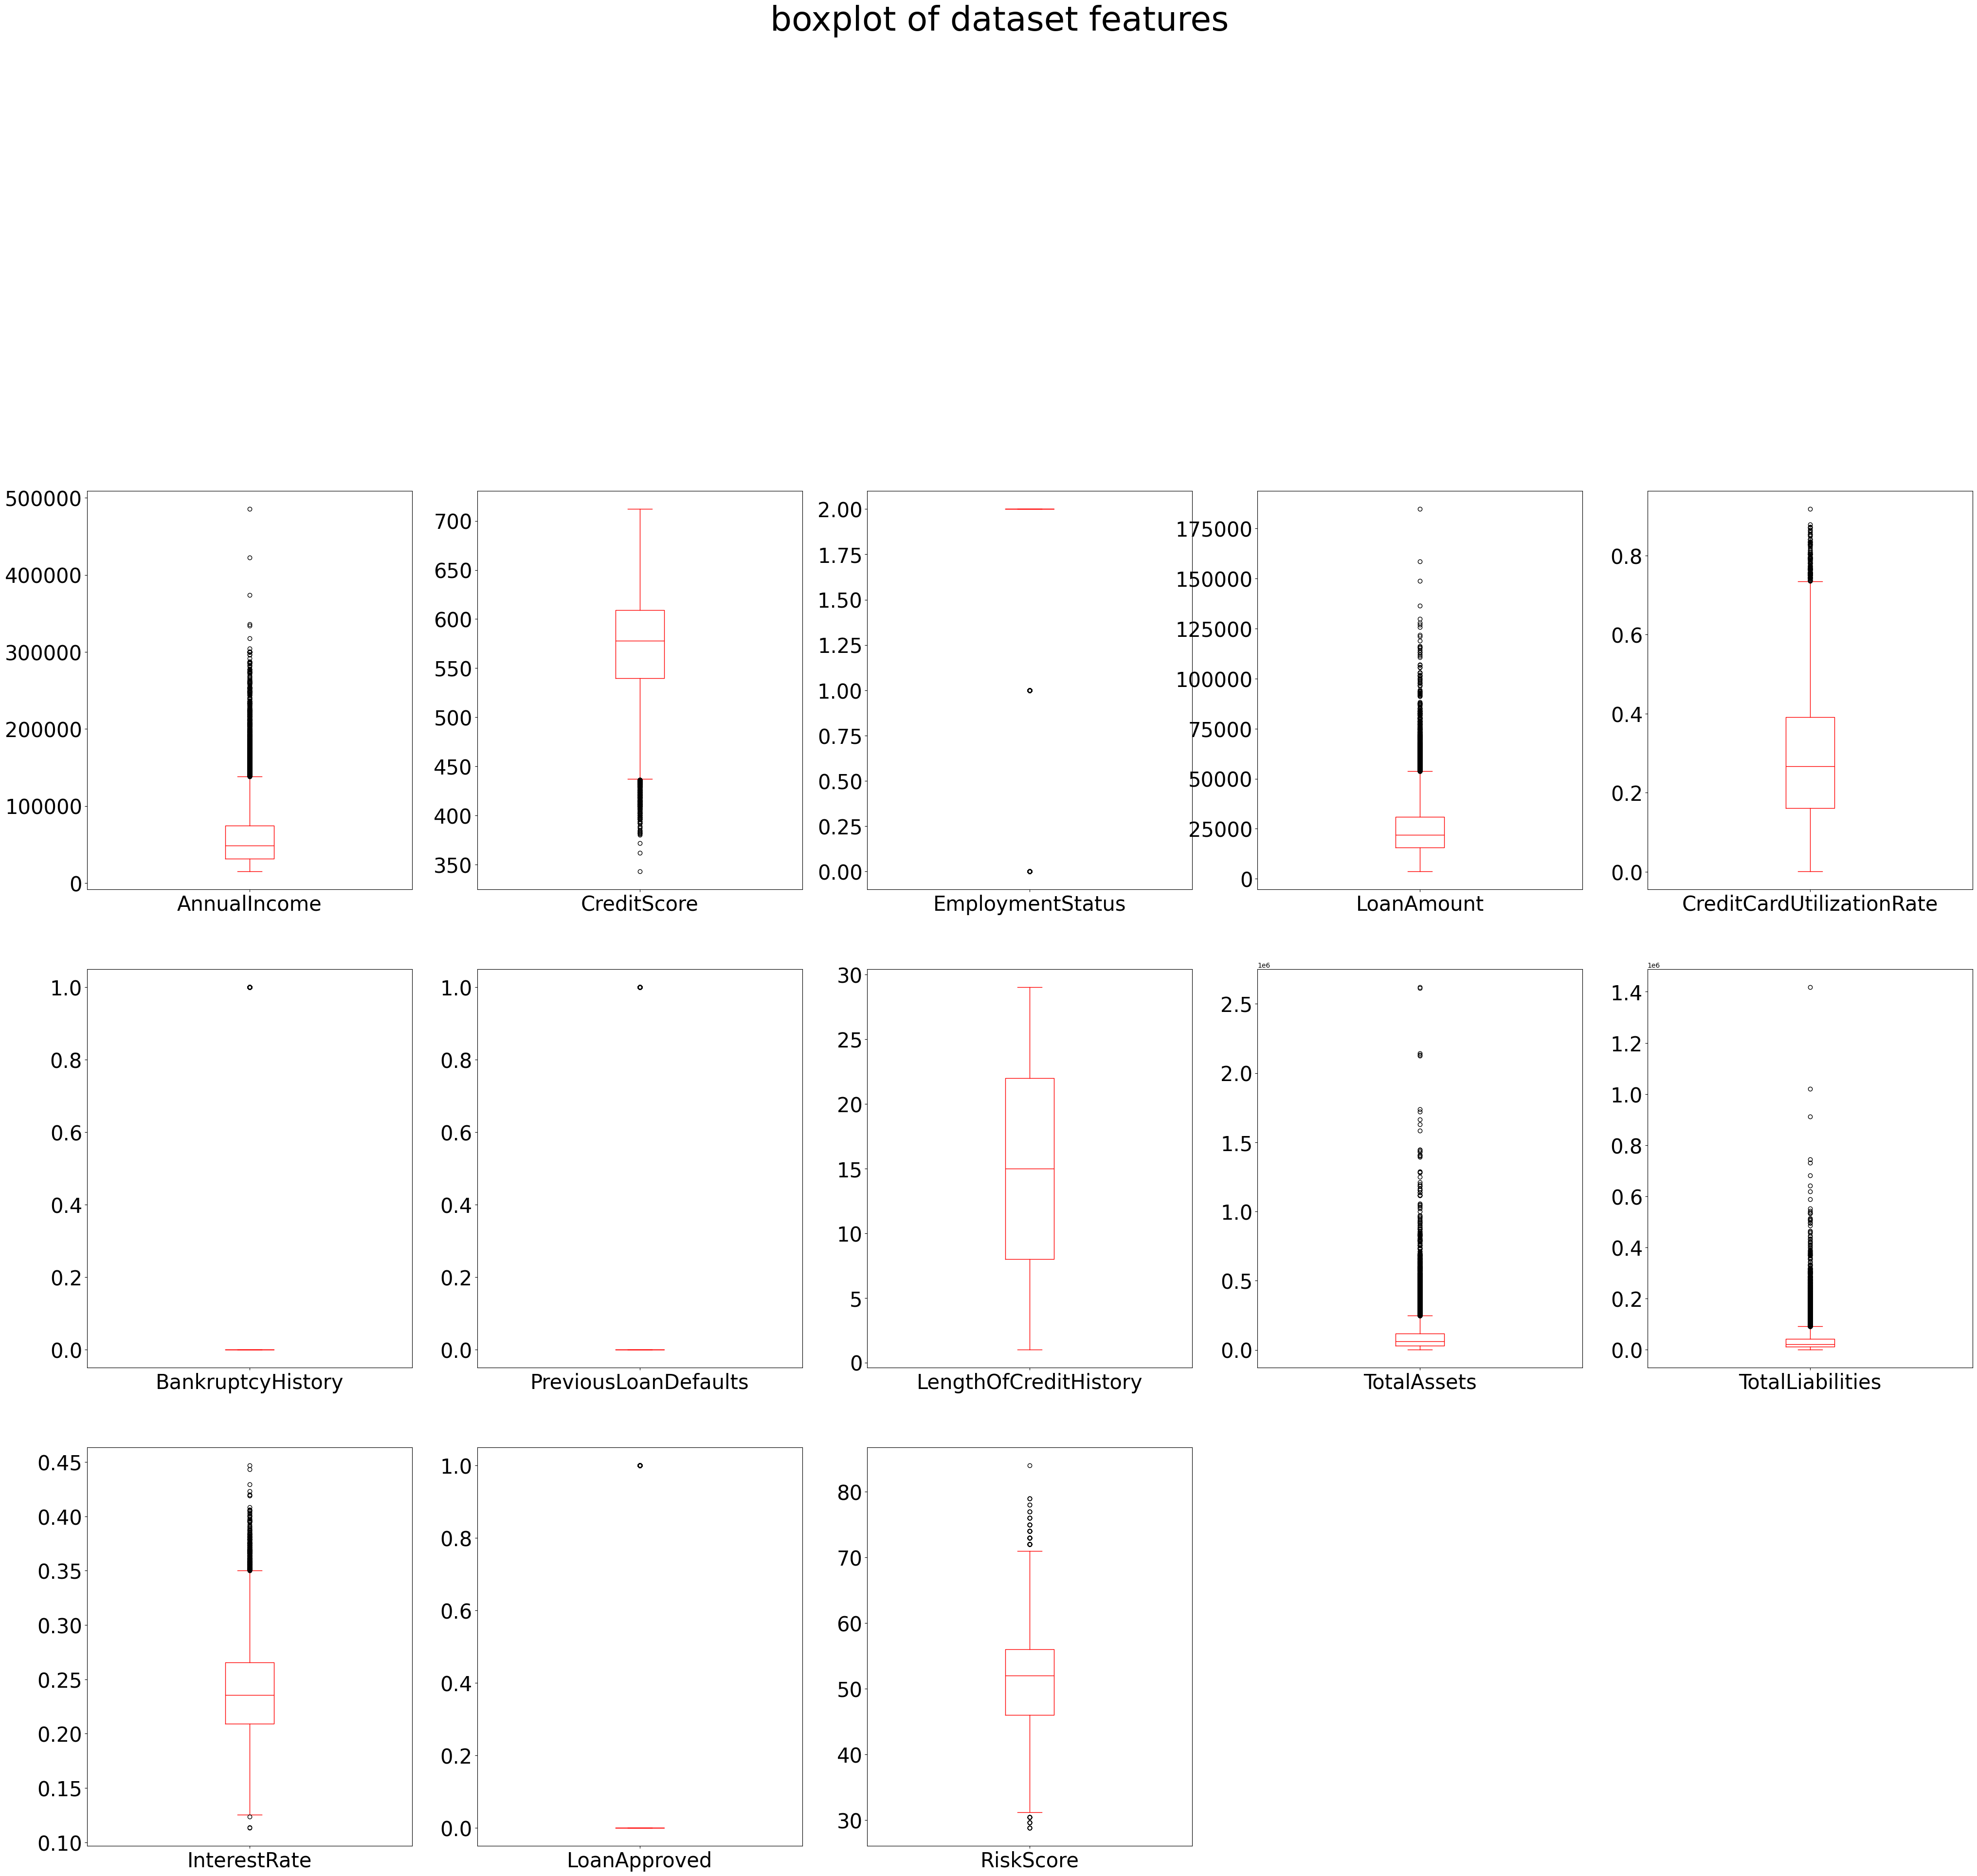

In [60]:
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='red',fontsize=30)
plt.suptitle('boxplot of dataset features',fontsize=50)
plt.show()

In [61]:
# create  a copy of the  original data for comparison
df_copy=df.copy()

def remove_outliers_iqr(df,exclude_columns):
    # loop through numeric columns
    for column in df.select_dtypes(include=[int,float]):
        if column in exclude_columns:
            continue # skip excluded columns

        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1

        #define outlier bound
        lower_bound= Q1-1.5 * IQR
        upper_bound= Q3+1.5 * IQR

        # filter out the outliers
        df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]

    return df


# defain the columns to exclude 
exclude_columns=['LoanApproved','RiskScore']

# remove outliers
df= remove_outliers_iqr(df,exclude_columns)

# print shape of databefore and after removing outliers
print("shape of data before removing outliers:",df_copy.shape)
print("shape of data after removing outliers:",df.shape)
print("number of outliers removed :",df_copy.shape[0]-df.shape[0])

shape of data before removing outliers: (20000, 13)
shape of data after removing outliers: (11093, 13)
number of outliers removed : 8907


In [62]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [63]:
pip install  xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
# model 
# for regression algorithmn
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostClassifier,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# for classification algorithmn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
# from sklearn.utis import class_weight
# from sklearn.model_selection inport KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [65]:
clas_model={'lr':LogisticRegression(max_iter=500),
            'rfc':RandomForestClassifier(),
            'dtc':DecisionTreeClassifier(),
            'knn':KNeighborsClassifier(n_neighbors=11),
            'svm':SVC(kernel='linear'),
            'gbc':GradientBoostingClassifier(),
            'etc':ExtraTreesClassifier(),
            'nb':GaussianNB()}

In [66]:
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# # dictionary to stoore risult
# result={'model':[],'accuracy':[],'precision':[],'recall':[],'f1-score':[]}

# # evaluate each model 
# for model_name, model in clas_model.items():
#     # train the model 
#     model.fit(x_train,y_train)
#     model_pred=model.predict(x_test)
    
#     # calculate metrics 
#     accuracy=accuracy_score(y_test,model_pred)
#     precition=precision_score(y_test,model_pred)
#     recall=recall_score(y_test,model_pred)
#     f1=f1_score(y_test,model_pred)

#     #store result in the dictionary

#     result['model'].append(model)
#     result['accuracy'].append(accuracy)
#     result['precision'].append(precition)
#     result['recall'].append(recall)
#     result['f1-score'].append(f1)

# data transformation


## CLASSIFICATION MODEL

### BINARY LOAN APPROVAL :
##### to determine the binary outcome of loan approval ,indicating whether an applicant is likly to be approved or denied for a loan

In [67]:
# convert loanapprovaled from float to int

df['LoanApproved']=df['LoanApproved'].astype(int)

x=df.drop(['LoanApproved','RiskScore'],axis=1)
y=df[['LoanApproved']]

In [68]:
df[['LoanApproved']].value_counts()

LoanApproved
0               8668
1               2425
Name: count, dtype: int64

In [69]:
# for evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

print('shape of training featurs:',x_train.shape)
print('shape of testing featurs:',x_test.shape)
print('shape of training featurs:',y_train.shape)
print('shape of testing featurs:',y_test.shape)

shape of training featurs: (8874, 11)
shape of testing featurs: (2219, 11)
shape of training featurs: (8874, 1)
shape of testing featurs: (2219, 1)


In [71]:
model=LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

# accuracy
acc= accuracy_score(y_test,y_pred)
print("accuracy:",acc)
# confusion matrix
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
# detailed classification report

print("\n classifiacation report :\n",classification_report(y_test,y_pred))

C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.885984677782785
confusion matrix:
 [[1623   84]
 [ 169  343]]

 classifiacation report :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1707
           1       0.80      0.67      0.73       512

    accuracy                           0.89      2219
   macro avg       0.85      0.81      0.83      2219
weighted avg       0.88      0.89      0.88      2219



In [72]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# dictionary to stoore risult
result={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'f1-score':[]}

# evaluate each model 
for model_name, model in clas_model.items():
    # train the model 
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)
    
    # calculate metrics 
    accuracy=accuracy_score(y_test,model_pred)
    precition=precision_score(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)

    #store result in the dictionary

    result['Model'].append(model)
    result['Accuracy'].append(accuracy)
    result['Precision'].append(precition)
    result['Recall'].append(recall)
    result['f1-score'].append(f1)

C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pc\AppData\Local\Packages

In [73]:
# convert result to a dataframe
result_df=pd.DataFrame(result)

# display the result in a table
result_df

,Model,Accuracy,Precision,Recall,f1-score
0,LogisticRegression(max_iter=500),0.914376,0.879717,0.728516,0.797009
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.921586,0.885845,0.757812,0.816842
2,DecisionTreeClassifier(),0.881478,0.746535,0.736328,0.741396
3,KNeighborsClassifier(n_neighbors=11),0.870212,0.761682,0.636719,0.693617
4,SVC(kernel='linear'),0.895448,0.808370,0.716797,0.759834
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.922938,0.884876,0.765625,0.820942
6,"(ExtraTreeClassifier(random_state=253019745), ...",0.918432,0.904645,0.722656,0.803474
7,GaussianNB(),0.883731,0.830729,0.623047,0.712054


In [74]:
x2s=scaled_df.drop('LoanApproved',axis=1)
y2s=scaled_df[['LoanApproved']]

x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size=0.2)

# dictionary to stoore risult
result={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'f1-score':[]}

# evaluate each model 
for model_name, model in clas_model.items():
    # train the model 
    model.fit(x2s_train,y2s_train)
    model_pred2=model.predict(x2s_test)
    
    # calculate metrics 
    accuracy2=accuracy_score(y2s_test,model_pred2)
    precition2=precision_score(y2s_test,model_pred2)
    recall2=recall_score(y2s_test,model_pred2)
    f12=f1_score(y2s_test,model_pred2)

    #store result in the dictionary

    result['Model'].append(model)
    result['Accuracy'].append(accuracy2)
    result['Precision'].append(precition2)
    result['Recall'].append(recall2)
    result['f1-score'].append(f12)

C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

In [75]:
# convert result to a dataframe
result_df2=pd.DataFrame(result)

result_df2

,Model,Accuracy,Precision,Recall,f1-score
0,LogisticRegression(max_iter=500),0.99575,0.993097,0.990167,0.991630
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.99250,0.989098,0.981318,0.985192
2,DecisionTreeClassifier(),0.98875,0.975538,0.980334,0.977930
3,KNeighborsClassifier(n_neighbors=11),0.98900,0.991911,0.964602,0.978066
4,SVC(kernel='linear'),0.99675,0.993124,0.994100,0.993612
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.99575,0.993097,0.990167,0.991630
6,"(ExtraTreeClassifier(random_state=1265198466),...",0.99650,0.998014,0.988201,0.993083
7,GaussianNB(),0.95300,0.895893,0.922321,0.908915


In [76]:
pip install jinja2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [77]:
# convert result to a dataframe
result_df2=pd.DataFrame(result)

# sort by accuracy

result_df2=result_df2.sort_values(by='Accuracy',ascending=False)

# display the result in a table
result_df2.style.background_gradient('Blues')

,Model,Accuracy,Precision,Recall,f1-score
4,SVC(kernel='linear'),0.996750,0.993124,0.994100,0.993612
6,ExtraTreesClassifier(),0.996500,0.998014,0.988201,0.993083
0,LogisticRegression(max_iter=500),0.995750,0.993097,0.990167,0.991630
5,GradientBoostingClassifier(),0.995750,0.993097,0.990167,0.991630
1,RandomForestClassifier(),0.992500,0.989098,0.981318,0.985192
3,KNeighborsClassifier(n_neighbors=11),0.989000,0.991911,0.964602,0.978066
2,DecisionTreeClassifier(),0.988750,0.975538,0.980334,0.977930
7,GaussianNB(),0.953000,0.895893,0.922321,0.908915
